# <font color='black'><h2 align="center">Lost in Translation</h2></font> <h2 align="center">*__Raúl Sánchez Enríquez__*</h2> <h3 align="center">*__September 12, 2020__*</h3>

<img src="https://www.python.org/static/img/python-logo.png" alt="python" style="width: 100px; float: auto;"/>
<br>
<a href = "https://nachocarnes.es"><img src="https://nachocarnes.es/wp-content/uploads/2018/04/ejWGXui6_400x400.png" alt="kschool" style="width: 100px; float: right;"/></a>


*__- Sales representatives require relevant information to address a customer and build rapport.This has a deep impact on customer experience.__*

*__- This work aims to reduce the gap between a model prediction and the information required for Sales representatives to address a customer (Explanation through Explainability).__*

<a class="anchor" id="index-bullet"></a> 
<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

* [1. Data preparation for analysis and pre-modeling](#first-bullet)
    - [Download raw data](#0.0-bullet)
    - [1.1 Categorical features preparation](#1.1-bullet)
    - [1.2 Numerical features preparation](#1.2-bullet)
    - [1.3 Merge categ and numerical files ](#1.3-bullet)
* [2 Process data for visualization](#second-bullet)
    - [2.1 Categorical features visualization](#2.1-bullet)
    - [2.1.1 Categorical features visualization (bar plot)](#2.1.1-bullet)
    - [2.1.2 Categorical features visualization (bar plot-base 100)](#2.1.2-bullet)
    - [2.2 Numercial visualization ](#2.2-bullet)
    - [2.3 Customers Geolocalization ](#2.3-bullet)


### Libraries

In [4]:
%autosave 240

Autosaving every 240 seconds


In [5]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from seaborn import kdeplot
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from mpl_toolkits.axes_grid.inset_locator import inset_axes
'''need to install first folium :conda install -c conda-forge folium'''
import folium  
import geopandas as gpd


%matplotlib inline



# 1.  Data preparation for analysis and pre-modeling <a class="anchor" id="first-bullet"></a>
[table of contents](#index-bullet)

### Download raw data <a class="anchor" id="0.0-bullet"></a>
[table of contents](#index-bullet)

In [6]:
# I downloaded the info from SAS. 
# I chuncksized it to upload it. 
warnings.simplefilter('ignore')
# For automation purpose i am going to look for the files path

pd.set_option('display.max_columns',50)

'''os.path.abspath  The path module suitable for 
the operating system Python is running on, and therefore usable 
for local paths.Return a normalized absolutized version of the pathname path
https://docs.python.org/2/library/os.path.html''' 
'''Original dataframe called Raw_data_TFM.CSV'''

mother_file_path = os.path.abspath("Raw_data_TFM.CSV") 

mother_file = pd.read_csv(mother_file_path,sep=';',chunksize =200000,low_memory=False)

# i read the file 

file = mother_file
''' call the file outside the loop'''
all_chunks =pd.DataFrame()

for i,chunk in enumerate(file):
    print(i,len(all_chunks))
    all_chunks = all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace =True)

# Record it

all_chunks.to_csv('Total_clients_ini.csv',sep= ';',index =False)


Total_clients_ini= pd.read_csv('Total_clients_ini.csv',sep=';',squeeze=True)

# filter non residents to avoid noise. 

total_clients_file_ini = Total_clients_ini[(Total_clients_ini['resi_country']== 'ES') &
                                           (Total_clients_ini['codseg']!= 'BC')]
# Drop features not relevant for this study
 
total_clients_file_ini.drop(['branch','codine','nat_country', 'resi_country','country',
                                                     'cod1','cod2',], axis=1,inplace =True)
total_clients_file_ini.shape

0 0
1 200000


(395937, 44)

In [7]:
'''sample() is an inbuilt function of random module in Python that returns 
a particular length list of items chosen from the sequence i.e. list, tuple,
string or set. Used for random sampling without replacement.
https://www.geeksforgeeks.org/python-random-sample-function/'''

total_clients_file_ini.sample(5)

,gender,age,studies,work_type,marital_status,codseg,cpper,cprovper,clocaper,autonper,population_cmun,disporent_cmun,num_cred_cards_0m,aveg_amount_cred_card_0m,num_current_acc_0m,aveg_amount_current_acc_0m,num_invest_funds_0m,aveg_amount_invest_funds_0m,mortgage,num_stocks_0m,aveg_amount_stocks_0m,acc_0m,mobile_0m,pc_0m,tablet_0m,national_transfers_0m,transfers_0m,app_par_0m,web_par_0m,amount_cards_0m,amount_trfr_0m,amount_salarypenr_0m,amount_rec_0m,amount_total_cards_0m,num_trfr_0m,num_trfe_0m,num_rec_0m,num_card_postpone_payment_3t4t_delta,aved_amount_postpone_payment_3t4t_delta,previous_loans,months_since_loan,car_years,House_years,got_loan
102609,V,66,2,A,V,PR,48009,28,419,13,1000.0,21367.0,0.0,0.00,1.0,147.92,0.0,0.00,N,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"862,344",0,"128,09743",0,1.0,0.0,2.0,0.0,0.00,0,NaN,0,33,0
115723,V,52,2,P,O,CN,49519,36,251,1,95643.0,20864.0,1.0,0.00,1.0,157.57,0.0,0.00,N,0.0,0,21.0,0.9523809523809524,0.047619047619047616,0.0,0.0,0.0,20.0,1.0,"134,26817","634,752",0,"385,88544","185,12946",20.0,0.0,6.0,0.0,0.00,0,NaN,9,15,0
334189,V,78,5,P,S,PI,32630,45,14,13,3182981,29400.0,2.0,636.73,1.0,6553.25,1.0,52029.57,N,6.0,"93188,41884",0.0,0,0,0,0.0,0.0,0.0,0.0,"617,1628","843,52416","1116,21516","3729,15565","850,9464",1.0,2.0,28.0,0.0,374.74,0,NaN,9,10,1
191578,V,33,3,A,S,PR,19005,23,536,8,10926,15738.0,0.0,0.00,1.0,2596.82,0.0,0.00,N,0.0,0,7.0,1,0,0,0.0,0.0,5.0,2.0,"61,42085","1097,16512","1451,85212",0,"84,6873",1.0,0.0,0.0,0.0,0.00,0,NaN,11,29,0
56825,H,79,5,J,S,PR,8003,28,90381,13,178288,22070.0,0.0,0.00,1.0,1126.85,0.0,0.00,N,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,"628,6272","831,8472","161,48005",0,1.0,0.0,6.0,0.0,0.00,0,NaN,3,54,0


In [8]:
# place the dependent feature as first column
newdf = total_clients_file_ini[total_clients_file_ini.columns[0:-1]]
newdf_contrata = total_clients_file_ini[total_clients_file_ini.columns[-1:]]
total_clients_file_ini = pd.concat([newdf_contrata, newdf], axis = 1)
total_clients_file_ini.sample(5)

,got_loan,gender,age,studies,work_type,marital_status,codseg,cpper,cprovper,clocaper,autonper,population_cmun,disporent_cmun,num_cred_cards_0m,aveg_amount_cred_card_0m,num_current_acc_0m,aveg_amount_current_acc_0m,num_invest_funds_0m,aveg_amount_invest_funds_0m,mortgage,num_stocks_0m,aveg_amount_stocks_0m,acc_0m,mobile_0m,pc_0m,tablet_0m,national_transfers_0m,transfers_0m,app_par_0m,web_par_0m,amount_cards_0m,amount_trfr_0m,amount_salarypenr_0m,amount_rec_0m,amount_total_cards_0m,num_trfr_0m,num_trfe_0m,num_rec_0m,num_card_postpone_payment_3t4t_delta,aved_amount_postpone_payment_3t4t_delta,previous_loans,months_since_loan,car_years,House_years
154313,0,H,59,2,O,C,CN,8018,5,90055,1,28996,19932.0,2.0,431.59,2.0,203.28,0.0,0.0,N,0.0,0,14.0,1,0,0,0.0,8.0,11.0,3.0,"346,25349","1762,97728",0,"966,31492","477,41562",6.0,5.0,11.0,0.0,0.0,0,NaN,10,1
176975,0,H,68,2,P,S,CN,NaN,29,471,12,3678,14753.0,3.0,221.83,2.0,23534.5,0.0,0.0,N,1.0,"3,41174",0.0,0,0,0,0.0,0.0,0.0,0.0,"409,41833","6975,36768",0,"3338,08226","564,50754",4.0,0.0,6.0,0.0,0.0,0,NaN,8,19
15303,0,V,70,3,A,O,PR,28033,28,383,7,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,N,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,"136,04684",0,0.0,0.0,2.0,0.0,0.0,0,NaN,7,23
229330,1,H,73,3,J,S,CN,NaN,15,214,13,3182981.0,29400.0,0.0,0.00,1.0,3319.25,0.0,0.0,S,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"343,96629","660,48544","874,00444","124,16766","474,26202",2.0,0.0,5.0,0.0,0.0,0,NaN,8,22
372555,0,V,60,5,J,O,PR,7004,28,103,13,128013,20531.0,0.0,0.00,1.0,84.04,0.0,0.0,N,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,"13,86615","787,51936","1042,10536","497,91248","19,1187",1.0,0.0,4.0,0.0,0.0,0,NaN,3,2


In [9]:
# Filter and print number of instances with feature got loan value =1 and with got loan =0 
print('Total clientes with loan: ',total_clients_file_ini[total_clients_file_ini.got_loan ==1].shape)
print('Total clientes without loan: ', total_clients_file_ini[total_clients_file_ini.got_loan ==0].shape)

Total clientes with loan:  (7005, 44)
Total clientes without loan:  (388932, 44)


In [10]:
'''column labels of the DataFrame 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html'''

total_clients_file_ini.columns

Index(['got_loan', 'gender', 'age', 'studies', 'work_type', 'marital_status',
       'codseg', 'cpper', 'cprovper', 'clocaper', 'autonper',
       'population_cmun', 'disporent_cmun', 'num_cred_cards_0m',
       'aveg_amount_cred_card_0m', 'num_current_acc_0m',
       'aveg_amount_current_acc_0m', 'num_invest_funds_0m',
       'aveg_amount_invest_funds_0m', 'mortgage', 'num_stocks_0m',
       'aveg_amount_stocks_0m', 'acc_0m', 'mobile_0m', 'pc_0m', 'tablet_0m',
       'national_transfers_0m', 'transfers_0m', 'app_par_0m', 'web_par_0m',
       'amount_cards_0m', 'amount_trfr_0m', 'amount_salarypenr_0m',
       'amount_rec_0m', 'amount_total_cards_0m', 'num_trfr_0m', 'num_trfe_0m',
       'num_rec_0m', 'num_card_postpone_payment_3t4t_delta',
       'aved_amount_postpone_payment_3t4t_delta', 'previous_loans',
       'months_since_loan', 'car_years', 'House_years'],
      dtype='object')

In [11]:
'''This method prints information about a DataFrame including the index
dtype and columns, non-null values and memory usage.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html''' 

total_clients_file_ini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395937 entries, 0 to 399999
Data columns (total 44 columns):
got_loan                                   395937 non-null int64
gender                                     395937 non-null object
age                                        395937 non-null int64
studies                                    395937 non-null int64
work_type                                  395937 non-null object
marital_status                             395937 non-null object
codseg                                     395937 non-null object
cpper                                      393708 non-null object
cprovper                                   395937 non-null object
clocaper                                   395937 non-null int64
autonper                                   393855 non-null object
population_cmun                            395937 non-null object
disporent_cmun                             395937 non-null float64
num_cred_cards_0m                 

In [12]:
# find number of NaN in each column

total_clients_file_ini.isnull().sum()

got_loan                                        0
gender                                          0
age                                             0
studies                                         0
work_type                                       0
marital_status                                  0
codseg                                          0
cpper                                        2229
cprovper                                        0
clocaper                                        0
autonper                                     2082
population_cmun                                 0
disporent_cmun                                  0
num_cred_cards_0m                             506
aveg_amount_cred_card_0m                        0
num_current_acc_0m                            506
aveg_amount_current_acc_0m                      0
num_invest_funds_0m                           506
aveg_amount_invest_funds_0m                     0
mortgage                                      114


In [13]:
# check for duplicates.
'''Return boolean Series denoting duplicate rows
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html'''

duplicateRowsDF = total_clients_file_ini[total_clients_file_ini.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)


Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [got_loan, gender, age, studies, work_type, marital_status, codseg, cpper, cprovper, clocaper, autonper, population_cmun, disporent_cmun, num_cred_cards_0m, aveg_amount_cred_card_0m, num_current_acc_0m, aveg_amount_current_acc_0m, num_invest_funds_0m, aveg_amount_invest_funds_0m, mortgage, num_stocks_0m, aveg_amount_stocks_0m, acc_0m, mobile_0m, pc_0m, tablet_0m, national_transfers_0m, transfers_0m, app_par_0m, web_par_0m, amount_cards_0m, amount_trfr_0m, amount_salarypenr_0m, amount_rec_0m, amount_total_cards_0m, num_trfr_0m, num_trfe_0m, num_rec_0m, num_card_postpone_payment_3t4t_delta, aved_amount_postpone_payment_3t4t_delta, previous_loans, months_since_loan, car_years, House_years]
Index: []


### 1.1 Categorical features preparation <a class="anchor" id="1.1-bullet"></a>
[table of contents](#index-bullet)

In [14]:
# 1.Create a Dataframe "categorical_file" only with categorical features.

colsToDrop = ['age', 
       'clocaper', 'autonper',
       'population_cmun', 'disporent_cmun', 'num_cred_cards_0m',
       'aveg_amount_cred_card_0m', 'num_current_acc_0m',
       'aveg_amount_current_acc_0m', 'num_invest_funds_0m',
       'aveg_amount_invest_funds_0m', 'num_stocks_0m',
       'aveg_amount_stocks_0m', 'acc_0m', 'mobile_0m', 'pc_0m', 'tablet_0m',
       'national_transfers_0m', 'transfers_0m', 'app_par_0m', 'web_par_0m',
       'amount_cards_0m', 'amount_trfr_0m', 'amount_salarypenr_0m',
       'amount_rec_0m', 'amount_total_cards_0m', 'num_trfr_0m', 'num_trfe_0m',
       'num_rec_0m', 'num_card_postpone_payment_3t4t_delta',
       'aved_amount_postpone_payment_3t4t_delta', 
       'months_since_loan', 'car_years', 'House_years']

categorical_file = total_clients_file_ini.drop(colsToDrop, axis=1)
'''shape is a tuple that gives you an indication of the number of dimensions'''
categorical_file.shape

(395937, 10)

In [15]:
categorical_file.sample(5)

,got_loan,gender,studies,work_type,marital_status,codseg,cpper,cprovper,mortgage,previous_loans
191686,0,H,2,J,C,PI,15006,46,N,0
140488,0,V,1,A,C,PR,20005,19,N,0
282794,0,V,2,J,V,PR,33001,11,S,0
361966,0,V,3,A,C,PB,29631,28,N,0
381645,0,V,1,A,S,PR,21440,28,N,0


In [16]:
'''transform categorical features '''
warnings.simplefilter('ignore')
# 2. Fill NaN accordingly in preparation to encode them

categorical_file[['mortgage']].fillna('N', inplace = True)
categorical_file[['cpper','cprovper']].fillna('11111', inplace = True)


# 3. Change all categorical variables into dummies 

'''In order to work properlly first you have to change feature 'studies' dtype to object'''

categorical_file['studies'] = categorical_file['studies'].astype('O')

categorical_file_mod_dummies= pd.get_dummies(categorical_file[['gender','studies',
                                                               'work_type','marital_status',
                                                               'codseg','mortgage']])
categorical_file_mod = pd.concat([categorical_file[['got_loan','cpper','cprovper',
                                                    'previous_loans']], categorical_file_mod_dummies], axis=1)

# 4. Replace special values from some features

'''replace() is an inbuilt function in Python programming language that 
returns a copy of the string where all occurrences of a substring is replaced 
with another substring'''

categorical_file_mod['cpper'].replace('********', value='11111',inplace=True)
categorical_file_mod['cpper'].replace('KS', value='11111',inplace=True)
categorical_file_mod['cpper'].replace('dic-00', value='11111',inplace=True)
categorical_file_mod['cpper'].fillna(0, inplace=True)

categorical_file_mod['cprovper'].replace('**', value='11111',inplace=True)
categorical_file_mod[['cpper','cprovper']].fillna( '11111', inplace = True) 
categorical_file_mod.head(5)

,got_loan,cpper,cprovper,previous_loans,gender_H,gender_V,studies_1,studies_2,studies_3,studies_4,studies_5,studies_6,work_type_A,work_type_J,work_type_O,work_type_P,marital_status_C,marital_status_D,marital_status_O,marital_status_S,marital_status_V,codseg_CN,codseg_PB,codseg_PI,codseg_PR,mortgage_N,mortgage_S
0,0,17455,4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,0,3640,39,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
2,0,11540,41,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,0,28022,11111,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,28232,33,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0


### 1.2 Numerical features preparation <a class="anchor" id="1.2-bullet"></a>
[table of contents](#index-bullet)

In [17]:
# 1. Recup  the features dropped previouslly. Create a dataframe and check its shape
usecols = colsToDrop.copy()
numerical_file = pd.DataFrame(total_clients_file_ini, columns = usecols)
numerical_file.shape

(395937, 34)

In [18]:
numerical_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395937 entries, 0 to 399999
Data columns (total 34 columns):
age                                        395937 non-null int64
clocaper                                   395937 non-null int64
autonper                                   393855 non-null object
population_cmun                            395937 non-null object
disporent_cmun                             395937 non-null float64
num_cred_cards_0m                          395431 non-null float64
aveg_amount_cred_card_0m                   395937 non-null float64
num_current_acc_0m                         395431 non-null float64
aveg_amount_current_acc_0m                 395937 non-null object
num_invest_funds_0m                        395431 non-null float64
aveg_amount_invest_funds_0m                395937 non-null float64
num_stocks_0m                              395431 non-null float64
aveg_amount_stocks_0m                      395937 non-null object
acc_0m                    

In [19]:
# 2. Replace decimal with commas by dots for all columns with 'amount' as part of the name

commas= numerical_file.loc[:,numerical_file.columns.str.contains("amount")]

for value in commas: 
    numerical_file.replace(',', '.',regex=True,inplace =True)
    numerical_file[value].to_frame()
    

# 3. Replace commas by dots for the rest of necessary features

commas2 = ['mobile_0m','pc_0m','population_cmun','tablet_0m']

for values in commas2:
    numerical_file[values].replace(',', '.',regex=True,inplace =True)
    numerical_file[value].to_frame()

# 4. Replace special values from some columns (change to 0). 

numerical_file['autonper'].replace('**', value='00',inplace=True)

# 5. Some columns have nan. i am going to replace it by 0.

change_nan = usecols.copy()

for value in change_nan:
    numerical_file[value].fillna('0' , inplace = True) 

# 6. Change dtype object to float

obj_cols_nf = numerical_file.select_dtypes('object').columns
numerical_file[obj_cols_nf] = numerical_file[obj_cols_nf].astype(float)


numerical_file.shape


(395937, 34)

In [20]:
numerical_file.sample(5)

,age,clocaper,autonper,population_cmun,disporent_cmun,num_cred_cards_0m,aveg_amount_cred_card_0m,num_current_acc_0m,aveg_amount_current_acc_0m,num_invest_funds_0m,aveg_amount_invest_funds_0m,num_stocks_0m,aveg_amount_stocks_0m,acc_0m,mobile_0m,pc_0m,tablet_0m,national_transfers_0m,transfers_0m,app_par_0m,web_par_0m,amount_cards_0m,amount_trfr_0m,amount_salarypenr_0m,amount_rec_0m,amount_total_cards_0m,num_trfr_0m,num_trfe_0m,num_rec_0m,num_card_postpone_payment_3t4t_delta,aved_amount_postpone_payment_3t4t_delta,months_since_loan,car_years,House_years
183178,47,65,13.0,3182981.0,29400.0,0.0,0.00,2.0,24530.75,0.0,0.0,0.0,0.00000,2.0,1.000000,0.000000,0.0,1.0,0.0,0.0,2.0,106.50728,2640.68896,1161.15996,568.95880,146.85264,3.0,1.0,3.0,0.0,0.0,0.0,8,5
354608,60,504,9.0,7392.0,24746.0,5.0,640.85,1.0,7475.44,0.0,0.0,1.0,197.31865,7.0,1.000000,0.000000,0.0,1.0,0.0,7.0,0.0,592.50869,15284.66112,3694.20468,1643.38733,816.95322,4.0,3.0,11.0,0.0,0.0,0.0,8,1
394484,61,65,1.0,5418.0,16877.0,2.0,25.67,1.0,9657.56,0.0,0.0,0.0,0.00000,14.0,1.000000,0.000000,0.0,1.0,2.0,13.0,1.0,0.00000,2270.95520,2931.42020,885.34205,0.00000,2.0,3.0,12.0,0.0,0.0,0.0,10,1
286056,43,940,9.0,2259.0,19433.0,0.0,0.00,1.0,4805.34,0.0,0.0,0.0,0.00000,7.0,0.857143,0.142857,0.0,1.0,0.0,5.0,1.0,407.46468,1418.47584,1877.03484,834.77792,561.81384,1.0,4.0,6.0,0.0,0.0,0.0,1,14
47902,63,249,16.0,23058.0,22765.0,0.0,0.00,1.0,10682.92,0.0,0.0,1.0,44.24779,33.0,0.121212,0.878788,0.0,0.0,0.0,4.0,29.0,184.18631,8561.21760,0.00000,1963.62682,253.95678,2.0,2.0,5.0,0.0,0.0,0.0,8,31


In [21]:
numerical_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395937 entries, 0 to 399999
Data columns (total 34 columns):
age                                        395937 non-null int64
clocaper                                   395937 non-null int64
autonper                                   395937 non-null float64
population_cmun                            395937 non-null float64
disporent_cmun                             395937 non-null float64
num_cred_cards_0m                          395937 non-null float64
aveg_amount_cred_card_0m                   395937 non-null float64
num_current_acc_0m                         395937 non-null float64
aveg_amount_current_acc_0m                 395937 non-null float64
num_invest_funds_0m                        395937 non-null float64
aveg_amount_invest_funds_0m                395937 non-null float64
num_stocks_0m                              395937 non-null float64
aveg_amount_stocks_0m                      395937 non-null float64
acc_0m                

### 1.3 Merge categ and numerical files <a class="anchor" id="1.3-bullet"></a>
[table of contents](#index-bullet)

In [22]:
# 1. Merge both files dropping feature 'got loan' from one of them

total_clients_mod = pd.concat([numerical_file,categorical_file_mod],axis =1)
col_name='got_loan'
'''Use POP to remove the item at the given position in the list, and return it. Avoid 
feature duplication '''
first_col = total_clients_mod.pop(col_name)
total_clients_mod.insert(0, col_name, first_col)
total_clients_mod.shape

(395937, 61)

In [23]:
total_clients_mod.sample(5)

,got_loan,age,clocaper,autonper,population_cmun,disporent_cmun,num_cred_cards_0m,aveg_amount_cred_card_0m,num_current_acc_0m,aveg_amount_current_acc_0m,num_invest_funds_0m,aveg_amount_invest_funds_0m,num_stocks_0m,aveg_amount_stocks_0m,acc_0m,mobile_0m,pc_0m,tablet_0m,national_transfers_0m,transfers_0m,app_par_0m,web_par_0m,amount_cards_0m,amount_trfr_0m,amount_salarypenr_0m,...,cprovper,previous_loans,gender_H,gender_V,studies_1,studies_2,studies_3,studies_4,studies_5,studies_6,work_type_A,work_type_J,work_type_O,work_type_P,marital_status_C,marital_status_D,marital_status_O,marital_status_S,marital_status_V,codseg_CN,codseg_PB,codseg_PI,codseg_PR,mortgage_N,mortgage_S
113890,0,41,5714,1.0,145115.0,20203.0,0.0,0.00,1.0,155.60,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.91323,470.18976,622.19076,...,30,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
41504,0,34,512,1.0,7411.0,14418.0,0.0,0.00,1.0,1026.95,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,...,30,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
208639,0,61,166,12.0,292986.0,21343.0,0.0,0.00,1.0,29013.60,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1518.51424,2009.41324,...,39,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
314784,0,42,527,16.0,314.0,29092.0,2.0,289.78,1.0,57802.69,0.0,0.0,1.0,23.83453,36.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,595.92043,2383.54944,2540.09344,...,32,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
137130,0,56,206,7.0,18666.0,19848.0,0.0,0.00,1.0,1812.25,0.0,0.0,0.0,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00000,1691.44704,2238.25104,...,50,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [24]:
total_clients_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395937 entries, 0 to 399999
Data columns (total 61 columns):
got_loan                                   395937 non-null int64
age                                        395937 non-null int64
clocaper                                   395937 non-null int64
autonper                                   395937 non-null float64
population_cmun                            395937 non-null float64
disporent_cmun                             395937 non-null float64
num_cred_cards_0m                          395937 non-null float64
aveg_amount_cred_card_0m                   395937 non-null float64
num_current_acc_0m                         395937 non-null float64
aveg_amount_current_acc_0m                 395937 non-null float64
num_invest_funds_0m                        395937 non-null float64
aveg_amount_invest_funds_0m                395937 non-null float64
num_stocks_0m                              395937 non-null float64
aveg_amount_stocks_0m   

In [25]:
# 2. Two columns are object. Transform to float 
obj_cols = total_clients_mod.select_dtypes('object').columns
total_clients_mod[obj_cols] = total_clients_mod[obj_cols].astype(float)

# 3. Changing all columns types to numerics and downcasting it. 
columns = total_clients_mod.columns

for cols in columns:
    if total_clients_mod[cols].dtype == 'float64' or total_clients_mod[cols].dtype == 'int64':
        total_clients_mod[cols] = pd.to_numeric(total_clients_mod[cols],
                                                downcast='unsigned')
    else:
        total_clients_mod[cols] = pd.to_numeric(total_clients_mod[cols],
                                                downcast='unsigned')

total_clients_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395937 entries, 0 to 399999
Data columns (total 61 columns):
got_loan                                   395937 non-null uint8
age                                        395937 non-null uint8
clocaper                                   395937 non-null uint32
autonper                                   395937 non-null uint8
population_cmun                            395937 non-null float64
disporent_cmun                             395937 non-null uint16
num_cred_cards_0m                          395937 non-null uint8
aveg_amount_cred_card_0m                   395937 non-null float64
num_current_acc_0m                         395937 non-null uint8
aveg_amount_current_acc_0m                 395937 non-null float64
num_invest_funds_0m                        395937 non-null uint8
aveg_amount_invest_funds_0m                395937 non-null float64
num_stocks_0m                              395937 non-null uint8
aveg_amount_stocks_0m             

In [26]:
total_clients_mod

,got_loan,age,clocaper,autonper,population_cmun,disporent_cmun,num_cred_cards_0m,aveg_amount_cred_card_0m,num_current_acc_0m,aveg_amount_current_acc_0m,num_invest_funds_0m,aveg_amount_invest_funds_0m,num_stocks_0m,aveg_amount_stocks_0m,acc_0m,mobile_0m,pc_0m,tablet_0m,national_transfers_0m,transfers_0m,app_par_0m,web_par_0m,amount_cards_0m,amount_trfr_0m,amount_salarypenr_0m,...,cprovper,previous_loans,gender_H,gender_V,studies_1,studies_2,studies_3,studies_4,studies_5,studies_6,work_type_A,work_type_J,work_type_O,work_type_P,marital_status_C,marital_status_D,marital_status_O,marital_status_S,marital_status_V,codseg_CN,codseg_PB,codseg_PI,codseg_PR,mortgage_N,mortgage_S
0,0,34,25,1,689434.0,22822,0,0.00,1,-171.00,0,0.0,0,0.00000,1,1.000000,0.000000,0.0,0,0,1,0,71.85620,83.52000,0.00000,...,4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,0,45,623,1,114238.0,21062,2,0.00,1,-265.00,0,0.0,0,0.00000,19,1.000000,0.000000,0.0,0,0,19,0,0.00000,1707.52000,0.00000,...,39,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0
2,0,67,236,9,1620809.0,28514,0,0.00,1,-31.00,0,0.0,0,0.00000,15,1.000000,0.000000,0.0,0,0,14,1,309.63923,2234.80960,2213.80156,...,41,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,0,40,90366,8,15225.0,18629,2,194.15,1,-275.00,0,0.0,1,6.80442,13,1.000000,0.000000,0.0,0,0,11,2,100.24607,1702.55520,1365.41320,...,11111,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,0,47,301,1,23222.0,17569,0,0.00,1,-178.00,0,0.0,0,0.00000,15,1.000000,0.000000,0.0,0,0,15,0,38.21530,0.00000,0.00000,...,33,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,53,159,10,23178.0,28339,0,0.00,1,99990.87,0,0.0,1,17.03011,10,1.000000,0.000000,0.0,0,0,10,0,0.00000,139.20000,0.00000,...,28,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
399996,0,89,818,10,787808.0,23532,0,0.00,1,99991.55,0,0.0,0,0.00000,0,0.000000,0.000000,0.0,0,0,0,0,14.29500,990.83488,1311.14788,...,28,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
399997,0,41,0,13,3182981.0,29400,2,225.25,3,99994.29,0,0.0,0,0.00000,10,1.000000,0.000000,0.0,1,2,9,1,3792.08230,4071.68352,3300.36052,...,33,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
399998,0,65,1046,17,14756.0,20470,0,0.00,2,99995.86,0,0.0,4,18810.80003,0,0.000000,0.000000,0.0,0,0,0,0,0.00000,1670.40000,0.00000,...,11111,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0


In [27]:
# 5. Basics Dataframe statistics 

'''Sets the value of all rows'''

pd.set_option('display.max_rows', 61)

'''Descriptive statistics include those that summarize the central tendency,
dispersion and shape of a dataset’s distribution, excluding NaN values.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html'''

total_clients_mod.describe(include = 'all').T  

,count,mean,std,min,25%,50%,75%,max
got_loan,395937.0,1.769221e-02,1.318303e-01,0.00,0.00000,0.00000,0.00000,1.000000e+00
age,395937.0,5.838590e+01,1.682447e+01,23.00,46.00000,58.00000,71.00000,9.400000e+01
clocaper,395937.0,9.880059e+03,2.740418e+04,0.00,125.00000,249.00000,603.00000,9.188000e+04
autonper,395937.0,8.300778e+00,4.688692e+00,0.00,5.00000,9.00000,13.00000,1.900000e+01
population_cmun,395937.0,4.891081e+05,9.764763e+05,0.00,12862.00000,67701.00000,292986.00000,3.182981e+06
disporent_cmun,395937.0,2.074890e+04,6.720090e+03,0.00,17704.00000,20975.00000,23112.00000,5.342800e+04
num_cred_cards_0m,395937.0,6.247181e-01,9.495152e-01,0.00,0.00000,0.00000,2.00000,1.000000e+01
aveg_amount_cred_card_0m,395937.0,8.720881e+01,3.938115e+02,-12352.56,0.00000,0.00000,4.49000,6.123705e+04
num_current_acc_0m,395937.0,1.221363e+00,6.015375e-01,0.00,1.00000,1.00000,1.00000,1.200000e+01
aveg_amount_current_acc_0m,395937.0,9.227327e+11,2.494677e+13,-300.00,490.64000,4890.95000,22511.32000,9.990000e+14


# 2 Process data for visualization <a class="anchor" id="second-bullet"></a>
[table of contents](#index-bullet)

### 2.1 Categorical features visualization <a class="anchor" id="2.1-bullet"></a>
[table of contents](#index-bullet)

In [28]:
# 1. Different feature treatment for visualization.

categorical_file_ndum = categorical_file[['got_loan','gender','studies','work_type','marital_status','codseg','mortgage','previous_loans']].copy() 
categorical_file_ndum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395937 entries, 0 to 399999
Data columns (total 8 columns):
got_loan          395937 non-null int64
gender            395937 non-null object
studies           395937 non-null object
work_type         395937 non-null object
marital_status    395937 non-null object
codseg            395937 non-null object
mortgage          395823 non-null object
previous_loans    395937 non-null int64
dtypes: int64(2), object(6)
memory usage: 27.2+ MB


In [29]:
# 2. Categorical features preparation for visualization

'''change all feature dtype to object'''
categorical_file_ndum=categorical_file_ndum.astype(str)

# 3. Change all but score categorical variables into dummies

''' columns to factorice. This process leaves only one column per category(LabelEncoder)'''

col_d = ['gender','studies','work_type','marital_status','codseg','mortgage',
         'previous_loans']
lb_make = LabelEncoder()

''' loop depending on the factorization process required.Label encoding here keeps a column 
labeling the categorical values as numbers'''
for value in col_d:
    try:
        categorical_file_ndum[value + '_dum']=lb_make.fit_transform(categorical_file_ndum[(value)])
        categorical_file_ndum[value + '_dum'].to_frame()
        categorical_file_ndum.drop([value], axis=1,inplace =True)
        pass

    except ValueError:  
        '''some varibles have to be converted from object to str first''' 
        categorical_file_ndum[value + '_dum'] = str(categorical_file_ndum[value])
        categorical_file_ndum[value + '_dum']=lb_make.fit_transform(categorical_file_ndum[str(value)])
        categorical_file_ndum[value + '_dum'].to_frame()
        categorical_file_ndum.drop([value], axis=1,inplace =True)
        pass

# 4. Merge all new columns into one DF

df2 = categorical_file_ndum

categorical_file_new = {col_d[0] +'_dum':df2[col_d[0] +'_dum'],
                        col_d[1] +'_dum':df2[col_d[1] +'_dum'],
                        col_d[2] +'_dum':df2[col_d[2] +'_dum'],
                        col_d[3] +'_dum':df2[col_d[3] +'_dum'],
                        col_d[4] +'_dum':df2[col_d[4] +'_dum'],
                        col_d[5] +'_dum':df2[col_d[5] +'_dum'],
                        col_d[6] +'_dum':df2[col_d[6] +'_dum']}  

categorical_file_new = pd.DataFrame(categorical_file_new, columns = [col_d[0] +'_dum',col_d[1] +'_dum',
                                                                     col_d[2] +'_dum',col_d[3] +'_dum',
                                                                     col_d[4] +'_dum',col_d[5] +'_dum',
                                                                     col_d[6] +'_dum'])
categorical_file_new.sample(5)
  

,gender_dum,studies_dum,work_type_dum,marital_status_dum,codseg_dum,mortgage_dum,previous_loans_dum
154517,1,1,0,3,3,0,0
112580,0,4,1,3,2,0,0
156581,0,0,0,0,2,0,0
183968,1,2,0,0,3,1,0
50656,0,0,1,3,2,0,0


In [30]:
# 5. Add dependent feature
categorical_file_final_graph = pd.concat([total_clients_mod.got_loan,categorical_file_new],axis=1, sort=False)
categorical_file_final_graph.sample(5)

,got_loan,gender_dum,studies_dum,work_type_dum,marital_status_dum,codseg_dum,mortgage_dum,previous_loans_dum
237088,0,1,1,0,0,3,0,0
220194,0,1,2,0,2,2,0,0
280628,0,1,2,1,2,3,1,0
350527,0,1,0,1,2,3,0,0
321622,0,0,0,0,0,3,0,0


In [31]:
# 6. The following code aims to match the categorical values with the given encoding.
values=['gender_dum','studies_dum','work_type_dum','marital_status_dum','codseg_dum','mortgage_dum','previous_loans_dum']
column_count = []
for col in values:
    n= categorical_file_final_graph[col].value_counts()
    column_count.append(n)
print(column_count)

[1    231526
0    164411
Name: gender_dum, dtype: int64, 1    128877
2     90340
0     86463
4     59652
5     24015
3      6590
Name: studies_dum, dtype: int64, 0    197963
1    102124
3     51700
2     44150
Name: work_type_dum, dtype: int64, 0    152021
3    136584
2     73401
4     19793
1     14138
Name: marital_status_dum, dtype: int64, 3    282934
2     59941
0     47565
1      5497
Name: codseg_dum, dtype: int64, 0    337754
1     58069
2       114
Name: mortgage_dum, dtype: int64, 0    380809
1     15128
Name: previous_loans_dum, dtype: int64]


In [32]:
# 7. Original categorical feature values. Count instances
values=['gender','studies','work_type','marital_status','codseg','mortgage','previous_loans']
column_count = []
for col in values:
    n= total_clients_file_ini[col].value_counts()
    column_count.append(n)
print(column_count)

[V    231526
H    164411
Name: gender, dtype: int64, 2    128877
3     90340
1     86463
5     59652
6     24015
4      6590
Name: studies, dtype: int64, A    197963
J    102124
P     51700
O     44150
Name: work_type, dtype: int64, C    152021
S    136584
O     73401
V     19793
D     14138
Name: marital_status, dtype: int64, PR    282934
PI     59941
CN     47565
PB      5497
Name: codseg, dtype: int64, N    337754
S     58069
Name: mortgage, dtype: int64, 0    380809
1     15128
Name: previous_loans, dtype: int64]


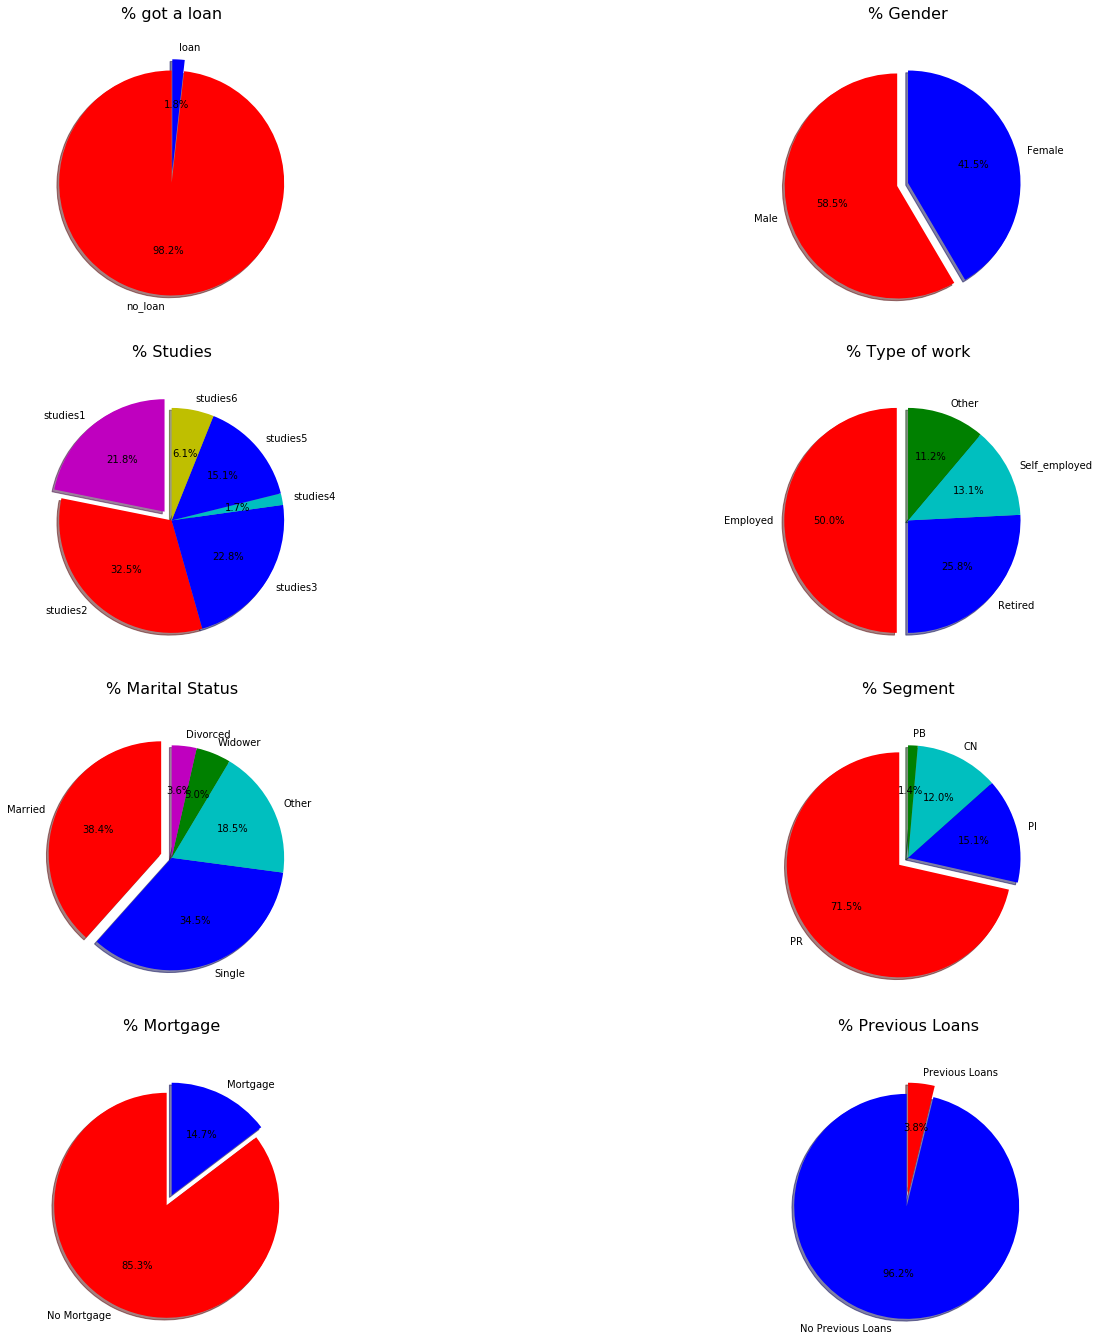

In [33]:
# 8. Plot all the categorical features without differenciating loan or not loan

#slices-count each score(pie plot)

df = categorical_file_final_graph.copy() 
compare_col_graph= 'got_loan'
plt.figure(figsize=(10,30))
'''values taking from the previous encoding results'''
val1,val2 = 0,1

''' count number clients with or without loan'''
no_loan = df.loc[df[compare_col_graph] == val1].count()
loan = df.loc[df[compare_col_graph] == val2].count()

plt.subplot(5, 2, 1)
title1 = '% got a loan\n'
plt.title(title1,fontsize = 16)
slices = [pd.Series(no_loan)[0],pd.Series(loan)[0]]
activities = ['no_loan','loan']
cols = ['r', 'b']
# plot

'''startangle :Angle from where the pie partitions start. In this case perpendicular to the tittle'''
'''shade: shade on the graph'''
'''explode: outstand some of the pie parts'''
'''autopct:include the percentage'''
plt.pie (slices,
        labels = activities,
        colors = cols,
        startangle = 90,  
        shadow = True,     
        explode = (0,0.1),  
        autopct = '%1.1f%%')  

# pie with gender

plt.subplot(5, 2, 2)
plt.subplots_adjust(right = 2)
title2 = '% Gender\n'
val1,val2 = 1,0

plt.title(title2,fontsize = 16)
compare_col_graph_gender= 'gender_dum'

male = df.loc[df[compare_col_graph_gender] == val1].count()
female = df.loc[df[compare_col_graph_gender] == val2].count() 

slices_gender = [pd.Series(male)[0],pd.Series(female)[0]]
activities_gender = ['Male','Female']
cols_gender = ['r','b']


plt.pie (slices_gender,
        labels = activities_gender,
        colors = cols_gender,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0),
        autopct = '%1.1f%%')

# pie with studies

plt.subplot(5, 2, 3)
# plt.subplots_adjust(right = 2.2)
title3 = '% Studies\n'
val1,val2,val3,val4,val5,val6 = 0,1,2,3,4,5
plt.title(title3,fontsize = 16)
compare_col_graph_work= 'studies_dum'

studies1 = df.loc[df[compare_col_graph_work] == val1].count()
studies2 = df.loc[df[compare_col_graph_work] == val2].count() 
studies3 = df.loc[df[compare_col_graph_work] == val3].count()
studies4 = df.loc[df[compare_col_graph_work] == val4].count() 
studies5 = df.loc[df[compare_col_graph_work] == val5].count() 
studies6 = df.loc[df[compare_col_graph_work] == val6].count()


slices_work = [pd.Series(studies1)[0],pd.Series(studies2)[0],pd.Series(studies3)[0],pd.Series(studies4)[0]
               ,pd.Series(studies5)[0],pd.Series(studies6)[0]]
activities_work = ['studies1','studies2','studies3','studies4','studies5','studies6']
cols_work = ['m', 'r', 'b','c','b','y']



plt.pie (slices_work,
        labels = activities_work,
        colors = cols_work,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0,0,0,0,0), 
        autopct = '%1.1f%%')  

# pie with type of work

plt.subplot(5, 2, 4)
plt.subplots_adjust(right = 2.2)
title4 = '% Type of work\n'
val1,val2,val3,val4 = 0,1,3,2
plt.title(title4,fontsize = 16)
compare_col_graph_work= 'work_type_dum'

employed = df.loc[df[compare_col_graph_work] == val1].count()
retired = df.loc[df[compare_col_graph_work] == val2].count() 
self_employed = df.loc[df[compare_col_graph_work] == val3].count()
other = df.loc[df[compare_col_graph_work] == val4].count() 

slices_work = [pd.Series(employed)[0],pd.Series(retired)[0],pd.Series(self_employed)[0],pd.Series(other)[0]]
activities_work = ['Employed','Retired','Self_employed','Other']
cols_work = ['r', 'b', 'c','g']



plt.pie (slices_work,
        labels = activities_work,
        colors = cols_work,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0,0,0), 
        autopct = '%1.1f%%')  

# pie with marital status

plt.subplot(5, 2, 5)
# plt.subplots_adjust(right = 2.2)
title5 = '% Marital Status\n'
val1,val2,val3,val4,val5 = 0,3,2,4,1
plt.title(title5,fontsize = 16)
compare_col_graph_work= 'marital_status_dum'

married = df.loc[df[compare_col_graph_work] == val1].count()
single = df.loc[df[compare_col_graph_work] == val2].count() 
other= df.loc[df[compare_col_graph_work] == val3].count()
widower = df.loc[df[compare_col_graph_work] == val4].count() 
divorced = df.loc[df[compare_col_graph_work] == val5].count()

slices_work = [pd.Series(married)[0],pd.Series(single)[0],pd.Series(other)[0],pd.Series(widower)[0],pd.Series(divorced)[0]]
activities_work = ['Married','Single','Other','Widower','Divorced']
cols_work = ['r', 'b', 'c','g','m']



plt.pie (slices_work,
        labels = activities_work,
        colors = cols_work,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0,0,0,0), 
        autopct = '%1.1f%%') 


# pie with segment

plt.subplot(5, 2, 6)
# plt.subplots_adjust(right = 2.2)
title6 = '% Segment\n'
val1,val2,val3,val4 = 3,2,0,1
plt.title(title6,fontsize = 16)
compare_col_graph_work= 'codseg_dum'

PR = df.loc[df[compare_col_graph_work] == val1].count()
PI = df.loc[df[compare_col_graph_work] == val2].count() 
CN = df.loc[df[compare_col_graph_work] == val3].count()
PB = df.loc[df[compare_col_graph_work] == val4].count() 

slices_work = [pd.Series(PR)[0],pd.Series(PI)[0],pd.Series(CN)[0],pd.Series(PB)[0]]
activities_work = ['PR','PI','CN','PB']
cols_work = ['r', 'b', 'c','g']

plt.pie (slices_work,
        labels = activities_work,
        colors = cols_work,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0,0,0), 
        autopct = '%1.1f%%') 

# pie with mortgage

plt.subplot(5, 2, 7)
plt.subplots_adjust(right = 2)
title7 = '% Mortgage\n'
val1,val2 = 0,1

plt.title(title7,fontsize = 16)
compare_col_graph_mortg= 'mortgage_dum'

no_mortg = df.loc[df[compare_col_graph_mortg] == val1].count()
mortg = df.loc[df[compare_col_graph_mortg] == val2].count() 

slices_mortg = [pd.Series(no_mortg)[0],pd.Series(mortg)[0]]
activities_mortg = ['No Mortgage','Mortgage']
cols_mortg = ['r','b']


plt.pie (slices_mortg,
        labels = activities_mortg,
        colors = cols_mortg,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0),
        autopct = '%1.1f%%')

# pie with previous loans

plt.subplot(5, 2, 8)
plt.subplots_adjust(right = 2)
title8 = '% Previous Loans\n'
val1,val2 = 0,1

plt.title(title8,fontsize = 16)
compare_col_graph_prevloans= 'previous_loans_dum'
no_prev_loans = df.loc[df[compare_col_graph_prevloans] == val1].count()
prev_loans = df.loc[df[compare_col_graph_prevloans] == val2].count() 

slices_prevloans = [pd.Series(no_prev_loans)[0],pd.Series(prev_loans)[0]]
activities_prevloans = ['No Previous Loans','Previous Loans']
cols_prevloans = ['b','r']


plt.pie (slices_prevloans,
        labels = activities_prevloans,
        colors = cols_prevloans,
        startangle = 90,  
        shadow = True,    
        explode = (0.1,0),
        autopct = '%1.1f%%')


plt.show()

### 2.1.1 Categorical features visualization (bar plot) <a class="anchor" id="2.1.1-bullet"></a>
[table of contents](#index-bullet)

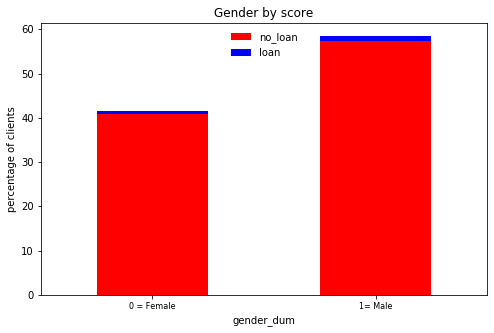

got_loan        0     1
gender_dum             
female      40.84  0.68
male        57.39  1.08


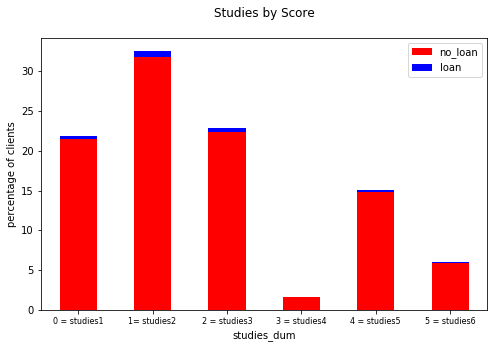

got_loan         0     1
studies_dum             
studies1     21.52  0.31
studies2     31.85  0.70
studies3     22.41  0.40
studies4      1.65  0.02
studies5     14.84  0.22
studies6      5.95  0.11


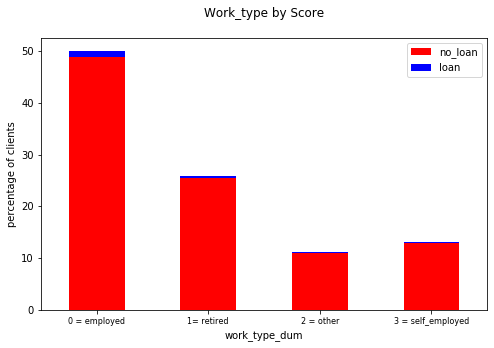

got_loan           0     1
work_type_dum             
employed       48.89  1.11
retired        25.50  0.29
other          11.01  0.14
self_employed  12.82  0.23


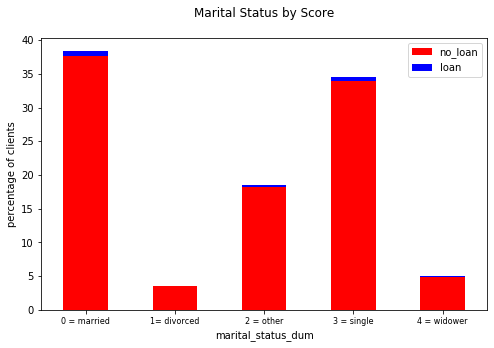

got_loan                0     1
marital_status_dum             
married             37.73  0.66
divorced             3.51  0.06
other               18.20  0.34
single              33.89  0.61
widower              4.91  0.09


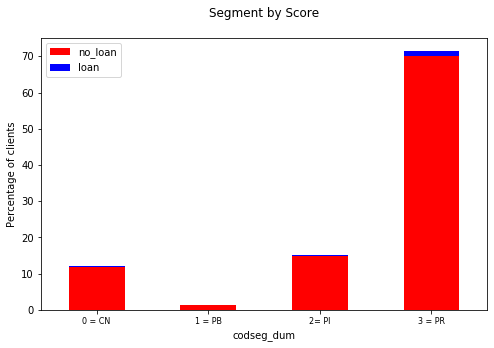

got_loan        0     1
codseg_dum             
CN          11.77  0.24
PB           1.38  0.01
PI          14.99  0.15
PR          70.09  1.37


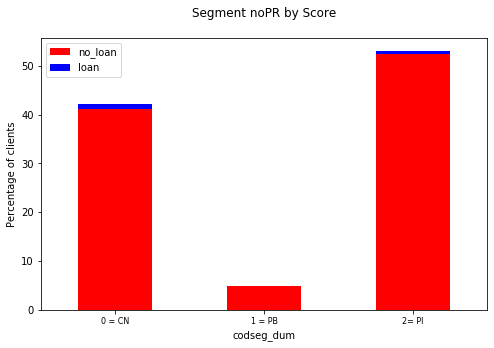

got_loan        0     1
codseg_dum             
CN          41.26  0.84
PB           4.83  0.04
PI          52.53  0.51


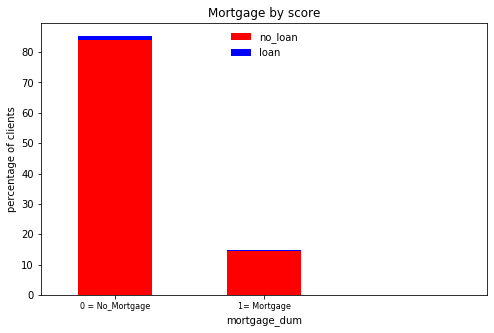

got_loan          0     1
mortgage_dum             
mortgage_no   83.86  1.45
mortgage_yes  14.35  0.32
2              0.03  0.00


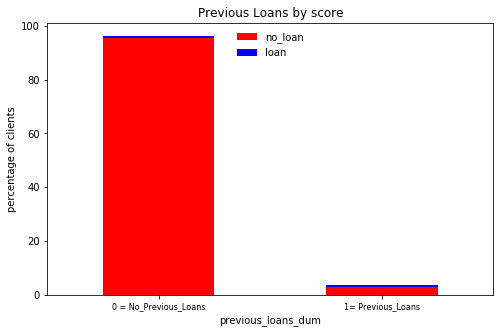

got_loan                0     1
previous_loans_dum             
previous_loans_no   95.27  0.91
previous_loans_yes   2.96  0.86


In [34]:
#  9. Same analysis done previously but differenciating with or without loan(bar plot)

# stacked graph
'''same values used'''
values_scored =  [0,1]

colors = ["r", "b"]

# gender

''' create df only with the columns i need'''
df_ge = df[['got_loan','gender_dum']]

''' group creating a new column counting the clients for each group'''
df_group_ge = df_ge.groupby(['got_loan','gender_dum'])['got_loan'].count().reset_index(name="count")
''' create percentage for each group category'''
percentage_dist_ge = 100 * df_group_ge[['count']].divide(df_group_ge[['count']].sum(), axis = 1)
''' drop the count so i keep only the percentage column'''
df_group_ge.drop(columns= 'count', inplace = True)
'''add the percentage column '''
gender_df= pd.concat([df_group_ge,percentage_dist_ge],axis = 1)

gender_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
'''transpose the df to create the stacked bar plot '''
pivot_df_ge = gender_df.pivot(index='gender_dum', columns='got_loan', values='percentage')

pivot_df_ge.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))

''' transpose to show the detail table underneath and rename the lengend '''
rename_df_ge = pivot_df_ge.rename(columns={"0": "No-Loan", "1": "Loan"},index={0 :"female",1: "male"})
'''round the values in the table under bar plot'''
rename_df_ge_r =rename_df_ge.round(2)

plt.title('Gender by score')
plt.ylabel('percentage of clients')
plt.xticks (range(2), ['0 = Female','1= Male'],size = 8,rotation=0)
'''rename the legend and plot it in the center'''
plt.legend(loc='upper center',labels = activities, frameon=False)
plt.show()
print(rename_df_ge_r)

# studies

df_st = df[['got_loan','studies_dum']]
df_group_st = df_st.groupby(['got_loan','studies_dum'])['got_loan'].count().reset_index(name="count")

percentage_dist_st = 100 * df_group_st[['count']].divide(df_group_st[['count']].sum(), axis = 1)
df_group_st.drop(columns= 'count', inplace = True)

st_df= pd.concat([df_group_st,percentage_dist_st],axis = 1)

st_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_st =st_df.pivot(index='studies_dum', columns='got_loan', values='percentage')

pivot_df_st.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_st = pivot_df_st.rename(columns={"0": "No-Loan", "1": "Loan"},
                                  index={0 :"studies1", 1: "studies2",2:"studies3",3:"studies4",4:"studies5",5:"studies6"})
                                                
rename_df_st_r =rename_df_st.round(2)

plt.title('Studies by Score\n')
plt.ylabel('percentage of clients')
plt.xticks (range(6), ['0 = studies1','1= studies2', '2 = studies3', '3 = studies4','4 = studies5','5 = studies6'],rotation=0,size = 8)
plt.legend(labels = activities)
plt.show()
print(rename_df_st_r)


# type of work

df_wt = df[['got_loan','work_type_dum']]
df_group_wt = df_wt.groupby(['got_loan','work_type_dum'])['got_loan'].count().reset_index(name="count")

percentage_dist_tiptrab = 100 * df_group_wt[['count']].divide(df_group_wt[['count']].sum(), axis = 1)
df_group_wt.drop(columns= 'count', inplace = True)

tiptraba_df= pd.concat([df_group_wt,percentage_dist_tiptrab],axis = 1)

tiptraba_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_wt = tiptraba_df.pivot(index='work_type_dum', columns='got_loan', values='percentage')

pivot_df_wt.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_wt = pivot_df_wt.rename(columns={"0": "No-Loan", "1": "Loan"},
                                  index={0 :"employed", 1: "retired",2:"other",3:"self_employed"})
                                                
rename_df_wt_r =rename_df_wt.round(2)

plt.title('Work_type by Score\n')
plt.ylabel('percentage of clients')
plt.xticks (range(4), ['0 = employed','1= retired', '2 = other', '3 = self_employed'],rotation=0,size = 8)
plt.legend(labels = activities)
plt.show()
print(rename_df_wt_r)

# marital status

df_ms = df[['got_loan','marital_status_dum']]
df_group_ms = df_ms.groupby(['got_loan','marital_status_dum'])['got_loan'].count().reset_index(name="count")

percentage_dist_ms = 100 * df_group_ms[['count']].divide(df_group_ms[['count']].sum(), axis = 1)
df_group_ms.drop(columns= 'count', inplace = True)

ms_df= pd.concat([df_group_ms,percentage_dist_ms],axis = 1)

ms_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_ms = ms_df.pivot(index='marital_status_dum', columns='got_loan', values='percentage')

pivot_df_ms.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_ms = pivot_df_ms.rename(columns={"0": "No-Loan", "1": "Loan"},
                                  index={0 :"married", 1: "divorced",2:"other",3:"single",4:"widower"})
                                                
rename_df_ms_r =rename_df_ms.round(2)

plt.title('Marital Status by Score\n')
plt.ylabel('percentage of clients')
plt.xticks (range(5), ['0 = married','1= divorced', '2 = other', '3 = single', '4 = widower'],rotation=0,size = 8)
plt.legend(labels = activities)
plt.show()
print(rename_df_ms_r)

# codseg_dum

df_seg = df[['got_loan','codseg_dum']]
df_group_seg = df_seg.groupby(['got_loan','codseg_dum'])['got_loan'].count().reset_index(name="count")
percentage_dist_seg = 100 * df_group_seg[['count']].divide(df_group_seg[['count']].sum(), axis = 1)
df_group_seg.drop(columns= 'count', inplace = True)
codseg_df= pd.concat([df_group_seg,percentage_dist_seg],axis = 1)

codseg_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_seg = codseg_df.pivot(index='codseg_dum', columns='got_loan', values='percentage')
pivot_df_seg.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_seg = pivot_df_seg.rename(columns={"0": "No-Loan", "1": "Loan"},
                                    index={0: "CN", 1: "PB", 2: "PI",3 : "PR"})
rename_df_seg_r =rename_df_seg.round(2)
plt.title('Segment by Score\n')
plt.ylabel('Percentage of clients')
plt.xticks (range(4), ['0 = CN','1 = PB','2= PI','3 = PR'],size = 8,rotation = 0)
plt.legend(labels = activities)
plt.show()
print(rename_df_seg_r)



# Segmento sin PR

df_seg_npr = df_seg.loc[df_seg['codseg_dum'] != 3]
df_group_seg_npr = df_seg_npr.groupby(['got_loan','codseg_dum'])['got_loan'].count().reset_index(name="count")
percentage_dist_seg_npr = 100 * df_group_seg_npr[['count']].divide(df_group_seg_npr[['count']].sum(), axis = 1)
df_group_seg_npr.drop(columns= 'count', inplace = True)
codseg_nopr_df= pd.concat([df_group_seg_npr,percentage_dist_seg_npr],axis = 1)

codseg_nopr_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_seg_npr = codseg_nopr_df.pivot(index='codseg_dum', columns='got_loan', values='percentage')
pivot_df_seg_npr.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_seg_npr = pivot_df_seg_npr.rename(columns={"0": "No-Loan", "1": "Loan"},
                                            index={0: "CN", 1: "PB", 2: "PI"})
rename_df_seg_npr_r =rename_df_seg_npr.round(2)

plt.title('Segment noPR by Score\n')
plt.ylabel('Percentage of clients')
plt.xticks (range(3), ['0 = CN','1 = PB','2= PI'],size = 8,rotation = 0)
plt.legend(labels = activities)
plt.show()
print(rename_df_seg_npr_r )


#mortgage

df_mor = df[['got_loan','mortgage_dum']]
df_group_mor = df_mor.groupby(['got_loan','mortgage_dum'])['got_loan'].count().reset_index(name="count")

percentage_dist_mor = 100 * df_group_mor[['count']].divide(df_group_mor[['count']].sum(), axis = 1)
df_group_mor.drop(columns= 'count', inplace = True)

mortgage_df= pd.concat([df_group_mor,percentage_dist_mor],axis = 1)

mortgage_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_mor = mortgage_df.pivot(index='mortgage_dum', columns='got_loan', values='percentage')

pivot_df_mor.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_mor = pivot_df_mor.rename(columns={"0": "No-Loan", "1": "Loan"},
                                    index={0 :"mortgage_no",1: "mortgage_yes"})
rename_df_mor_r =rename_df_mor.round(2)
plt.title('Mortgage by score')
plt.ylabel('percentage of clients')
plt.xticks (range(2), ['0 = No_Mortgage','1= Mortgage'],size = 8,rotation=0)
plt.legend(loc='upper center',labels = activities, frameon=False)
plt.show()
print(rename_df_mor_r)

#previous loans

df_prevloans = df[['got_loan','previous_loans_dum']]
df_group_prevloans = df_prevloans.groupby(['got_loan','previous_loans_dum'])['got_loan'].count().reset_index(name="count")

percentage_dist_prevloans = 100 * df_group_prevloans[['count']].divide(df_group_prevloans[['count']].sum(), axis = 1)
df_group_prevloans.drop(columns= 'count', inplace = True)

prevloans_df= pd.concat([df_group_prevloans,percentage_dist_prevloans],axis = 1)

prevloans_df.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_prevloans = prevloans_df.pivot(index='previous_loans_dum', columns='got_loan', values='percentage')

pivot_df_prevloans.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_prevloans = pivot_df_prevloans.rename(columns={"0": "No-Loan", "1": "Loan"},
                                    index={0 :"previous_loans_no",1: "previous_loans_yes"})
rename_df_prevloans_r =rename_df_prevloans.round(2)
plt.title('Previous Loans by score')
plt.ylabel('percentage of clients')
plt.xticks (range(2), ['0 = No_Previous_Loans','1= Previous_Loans'],size = 8,rotation=0)
plt.legend(loc='upper center',labels = activities, frameon=False)
plt.show()
print(rename_df_prevloans_r)


### 2.1.2 Categorical features visualization (bar plot-base 100) <a class="anchor" id="2.1.2-bullet"></a>
[table of contents](#index-bullet)

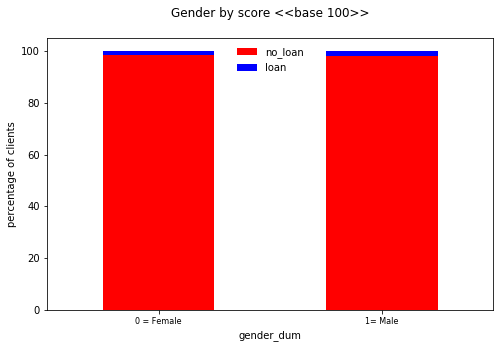

got_loan        0     1
gender_dum             
female      98.35  1.65
male        98.14  1.86


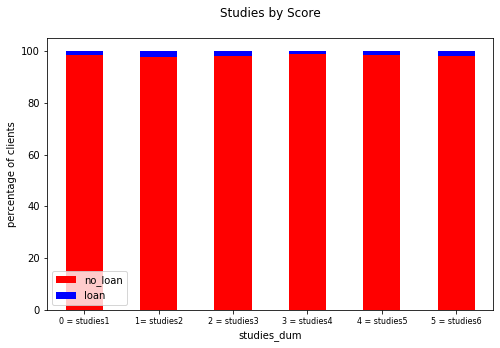

got_loan         0     1
studies_dum             
studies1     98.57  1.43
studies2     97.84  2.16
studies3     98.23  1.77
studies4     99.03  0.97
studies5     98.53  1.47
studies6     98.16  1.84


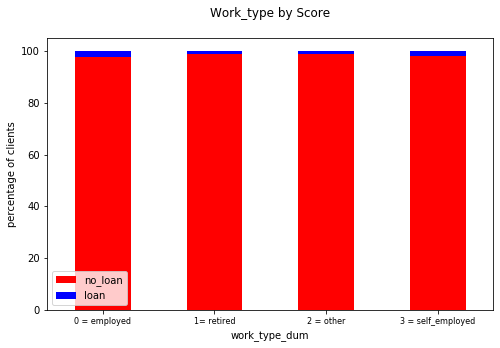

got_loan           0     1
work_type_dum             
employed       97.79  2.21
retired        98.87  1.13
other          98.75  1.25
self_employed  98.21  1.79


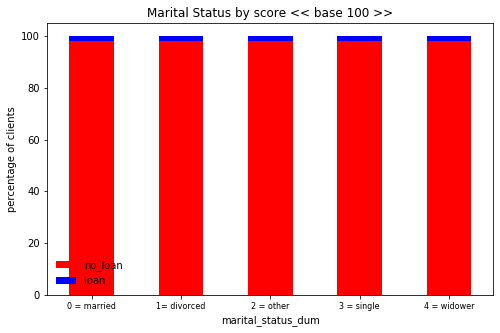

got_loan                0     1
marital_status_dum             
married             98.27  1.73
divorced            98.18  1.82
other               98.15  1.85
single              98.23  1.77
widower             98.27  1.73


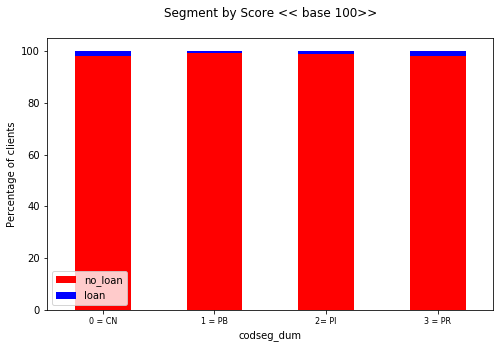

got_loan        0     1
codseg_dum             
CN          98.02  1.98
PB          99.20  0.80
PI          99.04  0.96
PR          98.08  1.92


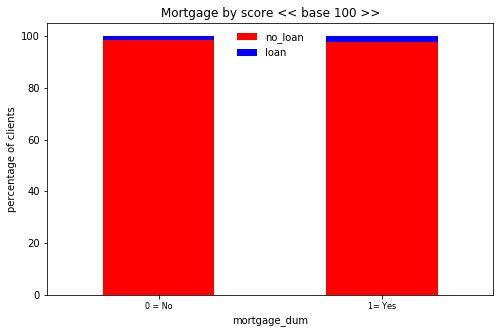

got_loan          0     1
mortgage_dum             
mortgage_no   98.30  1.70
mortgage_yes  97.81  2.19


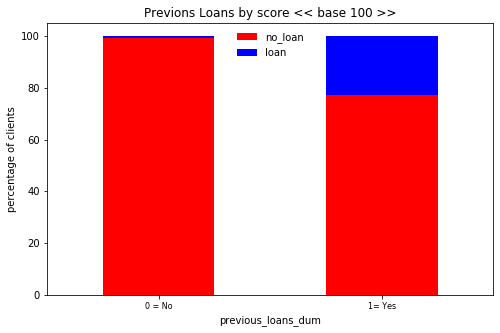

got_loan                0      1
previous_loans_dum              
Previous_Loans_no   99.06   0.94
Previous_Loans_yes  77.41  22.59


In [35]:
# 10. study to understand under which conditions the model gives a higher probability 
# of getting a loan of each group

col1= 'got_loan'
# gender base 100
''' create df only with the columns i need'''
df_gender = df[[col1,'gender_dum']]
''' group creating a new column cunting the clients for each group'''
df_group_gender = df_gender.groupby([col1,'gender_dum'])[col1].count().reset_index(name="count")
''' create percentage for each group category. In this case female and male'''
df_group_gender_0 =df_group_gender[df_group_gender['gender_dum'] == 0]
percentage_dist_gender_0 = 100 * df_group_gender_0[['count']].divide(df_group_gender_0[['count']].sum(), axis = 1)
''' drop the count so i keep only the percentage column'''
df_group_gender_0.drop(columns= 'count', inplace = True)
'''add the percentage column '''
gender_d_0= pd.concat([df_group_gender_0,percentage_dist_gender_0],axis = 1)


df_group_gender_1 =df_group_gender[df_group_gender['gender_dum'] == 1]
percentage_dist_gender_1 = 100 * df_group_gender_1[['count']].divide(df_group_gender_1[['count']].sum(), axis = 1)
df_group_gender_1.drop(columns= 'count', inplace = True)
gender_d_1= pd.concat([df_group_gender_1,percentage_dist_gender_1],axis = 1)


gender_df_base100= pd.concat([gender_d_0,gender_d_1],axis = 0)
gender_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
'''transpose the df to create the stacked bar plot '''
pivot_df_ge_base100 = gender_df_base100.pivot(index='gender_dum', columns=col1, values='percentage')

pivot_df_ge_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
''' transpose to show the detail table underneath and rename the lengend '''
rename_df_ge_base100 = pivot_df_ge_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                  index={0 :"female",1: "male"})
'''round the values in the table underneath bar plot'''
rename_df_ge_r_base100 =rename_df_ge_base100.round(2)
plt.title('Gender by score <<base 100>>\n')
plt.ylabel('percentage of clients')
plt.xticks (range(2), ['0 = Female','1= Male'],size = 8,rotation=0)
plt.legend(loc='upper center',labels = activities, frameon=False)
plt.show()
print(rename_df_ge_r_base100)

# Studies base 100

df_st = df[[col1,'studies_dum']]
df_group_st = df_st.groupby([col1,'studies_dum'])[col1].count().reset_index(name="count")

df_group_st_0 =df_group_st[df_group_st['studies_dum'] == 0]
percentage_dist_st_0 = 100 * df_group_st_0[['count']].divide(df_group_st_0[['count']].sum(), axis = 1)
df_group_st_0.drop(columns= 'count', inplace = True)
st_d_0= pd.concat([df_group_st_0,percentage_dist_st_0],axis = 1)
    
df_group_st_1 =df_group_st[df_group_st['studies_dum'] == 1]
percentage_dist_st_1 = 100 * df_group_st_1[['count']].divide(df_group_st_1[['count']].sum(), axis = 1)
df_group_st_1.drop(columns= 'count', inplace = True)
st_d_1= pd.concat([df_group_st_1,percentage_dist_st_1],axis = 1)

df_group_st_2 =df_group_st[df_group_st['studies_dum'] == 2]
percentage_dist_st_2 = 100 * df_group_st_2[['count']].divide(df_group_st_2[['count']].sum(), axis = 1)
df_group_st_2.drop(columns= 'count', inplace = True)
st_d_2= pd.concat([df_group_st_2,percentage_dist_st_2],axis = 1)

df_group_st_3=df_group_st[df_group_st['studies_dum'] == 3]
percentage_dist_st_3 = 100 * df_group_st_3[['count']].divide(df_group_st_3[['count']].sum(), axis = 1)
df_group_st_3.drop(columns= 'count', inplace = True)
st_d_3= pd.concat([df_group_st_3,percentage_dist_st_3],axis = 1)

df_group_st_4=df_group_st[df_group_st['studies_dum'] == 4]
percentage_dist_st_4 = 100 * df_group_st_4[['count']].divide(df_group_st_4[['count']].sum(), axis = 1)
df_group_st_4.drop(columns= 'count', inplace = True)
st_d_4= pd.concat([df_group_st_4,percentage_dist_st_4],axis = 1)

df_group_st_5=df_group_st[df_group_st['studies_dum'] == 5]
percentage_dist_st_5 = 100 * df_group_st_5[['count']].divide(df_group_st_5[['count']].sum(), axis = 1)
df_group_st_5.drop(columns= 'count', inplace = True)
st_d_5= pd.concat([df_group_st_5,percentage_dist_st_5],axis = 1)

st_df_base100= pd.concat([st_d_0,st_d_1,st_d_2,st_d_3,st_d_4,st_d_5],axis = 0)

st_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_st_base100 = st_df_base100.pivot(index='studies_dum', columns=col1, values='percentage')

pivot_df_st_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_st_base100 = pivot_df_st_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                  index={0 :"studies1",1: "studies2",2:"studies3",3:"studies4",4:"studies5",5:"studies6"})
rename_df_st_r_base100 =rename_df_st_base100.round(2)
plt.title('Studies by Score\n')
plt.ylabel('percentage of clients')
plt.xticks (range(6), ['0 = studies1','1= studies2', '2 = studies3', '3 = studies4', '4 = studies5', '5 = studies6'],rotation=0,size = 8)
plt.legend(labels = activities)
plt.show()
print(rename_df_st_r_base100)

# type of work base 100

df_wt = df[[col1,'work_type_dum']]
df_group_wt = df_wt.groupby([col1,'work_type_dum'])[col1].count().reset_index(name="count")

df_group_wt_0 =df_group_wt[df_group_wt['work_type_dum'] == 0]
percentage_dist_wt_0 = 100 * df_group_wt_0[['count']].divide(df_group_wt_0[['count']].sum(), axis = 1)
df_group_wt_0.drop(columns= 'count', inplace = True)
wt_d_0= pd.concat([df_group_wt_0,percentage_dist_wt_0],axis = 1)
    
df_group_wt_1 =df_group_wt[df_group_wt['work_type_dum'] == 1]
percentage_dist_wt_1 = 100 * df_group_wt_1[['count']].divide(df_group_wt_1[['count']].sum(), axis = 1)
df_group_wt_1.drop(columns= 'count', inplace = True)
wt_d_1= pd.concat([df_group_wt_1,percentage_dist_wt_1],axis = 1)

df_group_wt_2 =df_group_wt[df_group_wt['work_type_dum'] == 2]
percentage_dist_wt_2 = 100 * df_group_wt_2[['count']].divide(df_group_wt_2[['count']].sum(), axis = 1)
df_group_wt_2.drop(columns= 'count', inplace = True)
wt_d_2= pd.concat([df_group_wt_2,percentage_dist_wt_2],axis = 1)

df_group_wt_3=df_group_wt[df_group_wt['work_type_dum'] == 3]
percentage_dist_wt_3 = 100 * df_group_wt_3[['count']].divide(df_group_wt_3[['count']].sum(), axis = 1)
df_group_wt_3.drop(columns= 'count', inplace = True)
wt_d_3= pd.concat([df_group_wt_3,percentage_dist_wt_3],axis = 1)

wt_df_base100= pd.concat([wt_d_0,wt_d_1,wt_d_2,wt_d_3],axis = 0)

wt_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_wt_base100 = wt_df_base100.pivot(index='work_type_dum', columns=col1, values='percentage')

pivot_df_wt_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_wt_base100 = pivot_df_wt_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                  index={0 :"employed",1: "retired",2:"other",3:"self_employed"})
rename_df_wt_r_base100 =rename_df_wt_base100.round(2)
plt.title('Work_type by Score\n')
plt.ylabel('percentage of clients')
plt.xticks (range(4), ['0 = employed','1= retired', '2 = other', '3 = self_employed'],rotation=0,size = 8)
plt.legend(labels = activities)
plt.show()
print(rename_df_wt_r_base100)

# marital status base 100

df_ms = df[[col1,'marital_status_dum']]
df_group_ms = df_ms.groupby([col1,'marital_status_dum'])[col1].count().reset_index(name="count")

df_group_ms_0 =df_group_ms[df_group_ms['marital_status_dum'] == 0]
percentage_dist_ms_0 = 100 * df_group_ms_0[['count']].divide(df_group_ms_0[['count']].sum(), axis = 1)
df_group_ms_0.drop(columns= 'count', inplace = True)
ms_d_0= pd.concat([df_group_ms_0,percentage_dist_ms_0],axis = 1)

df_group_ms_1 =df_group_ms[df_group_ms['marital_status_dum'] == 1]
percentage_dist_ms_1 = 100 * df_group_ms_1[['count']].divide(df_group_ms_1[['count']].sum(), axis = 1)
df_group_ms_1.drop(columns= 'count', inplace = True)
ms_d_1= pd.concat([df_group_ms_1,percentage_dist_ms_1],axis = 1)

df_group_ms_2 =df_group_ms[df_group_ms['marital_status_dum'] == 2]
percentage_dist_ms_2 = 100 * df_group_ms_2[['count']].divide(df_group_ms_2[['count']].sum(), axis = 1)
df_group_ms_2.drop(columns= 'count', inplace = True)
ms_d_2= pd.concat([df_group_ms_2,percentage_dist_ms_2],axis = 1)

df_group_ms_3 =df_group_ms[df_group_ms['marital_status_dum'] == 3]
percentage_dist_ms_3 = 100 * df_group_ms_3[['count']].divide(df_group_ms_3[['count']].sum(), axis = 1)
df_group_ms_3.drop(columns= 'count', inplace = True)
ms_d_3= pd.concat([df_group_ms_3,percentage_dist_ms_3],axis = 1)

df_group_ms_4 =df_group_ms[df_group_ms['marital_status_dum'] == 4]
percentage_dist_ms_4 = 100 * df_group_ms_4[['count']].divide(df_group_ms_4[['count']].sum(), axis = 1)
df_group_ms_4.drop(columns= 'count', inplace = True)
ms_d_4= pd.concat([df_group_ms_4,percentage_dist_ms_4],axis = 1)


ms_df_base100= pd.concat([ms_d_0,ms_d_1,ms_d_2,ms_d_3,ms_d_4],axis = 0)

ms_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_ms_base100 = ms_df_base100.pivot(index='marital_status_dum', columns='got_loan', values='percentage')

pivot_df_ms_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_ms_base100 = pivot_df_ms_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                    index={0 :"married", 1: "divorced",2:"other",3:"single",4:"widower"})
rename_df_ms_r_base100 =rename_df_ms_base100.round(2)
plt.title('Marital Status by score << base 100 >>')
plt.ylabel('percentage of clients')
plt.xticks (range(5), ['0 = married','1= divorced', '2 = other', '3 = single', '4 = widower'],size = 8,rotation=0)
plt.legend(labels = activities, frameon=False)
plt.show()
print(rename_df_ms_r_base100)

# codseg_dum base 100 


df_seg = df[[col1,'codseg_dum']]
df_group_seg = df_seg.groupby([col1,'codseg_dum'])[col1].count().reset_index(name="count")

df_group_seg_0 =df_group_seg[df_group_seg['codseg_dum'] == 0]
percentage_dist_seg_0 = 100 * df_group_seg_0[['count']].divide(df_group_seg_0[['count']].sum(), axis = 1)
df_group_seg_0.drop(columns= 'count', inplace = True)
seg_d_0= pd.concat([df_group_seg_0,percentage_dist_seg_0],axis = 1)
    
df_group_seg_1 =df_group_seg[df_group_seg['codseg_dum'] == 1]
percentage_dist_seg_1 = 100 * df_group_seg_1[['count']].divide(df_group_seg_1[['count']].sum(), axis = 1)
df_group_seg_1.drop(columns= 'count', inplace = True)
seg_d_1= pd.concat([df_group_seg_1,percentage_dist_seg_1],axis = 1)

df_group_seg_2 =df_group_seg[df_group_seg['codseg_dum'] == 2]
percentage_dist_seg_2 = 100 * df_group_seg_2[['count']].divide(df_group_seg_2[['count']].sum(), axis = 1)
df_group_seg_2.drop(columns= 'count', inplace = True)
seg_d_2= pd.concat([df_group_seg_2,percentage_dist_seg_2],axis = 1)

df_group_seg_3=df_group_seg[df_group_seg['codseg_dum'] == 3]
percentage_dist_seg_3 = 100 * df_group_seg_3[['count']].divide(df_group_seg_3[['count']].sum(), axis = 1)
df_group_seg_3.drop(columns= 'count', inplace = True)
seg_d_3= pd.concat([df_group_seg_3,percentage_dist_seg_3],axis = 1)

seg_df_base100= pd.concat([seg_d_0,seg_d_1,seg_d_2,seg_d_3],axis = 0)

seg_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_seg_base100 = seg_df_base100.pivot(index='codseg_dum', columns=col1, values='percentage')

pivot_df_seg_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_seg_base100 = pivot_df_seg_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                    index={0 :"CN",1: "PB",2:"PI",3:"PR"})
rename_df_seg_r_base100 =rename_df_seg_base100.round(2)
plt.title('Segment by Score << base 100>>\n')
plt.ylabel('Percentage of clients')
plt.xticks (range(4), ['0 = CN','1 = PB','2= PI','3 = PR'],size = 8,rotation = 0)
plt.legend(labels = activities)
plt.show()
print(rename_df_seg_r_base100)



# mortgage base 100

df_mor = df[[col1,'mortgage_dum']]
df_group_mor = df_mor.groupby([col1,'mortgage_dum'])[col1].count().reset_index(name="count")

df_group_mor_0 =df_group_mor[df_group_mor['mortgage_dum'] == 0]
percentage_dist_mor_0 = 100 * df_group_mor_0[['count']].divide(df_group_mor_0[['count']].sum(), axis = 1)
df_group_mor_0.drop(columns= 'count', inplace = True)
mortgage_d_0= pd.concat([df_group_mor_0,percentage_dist_mor_0],axis = 1)

df_group_mor_1 =df_group_mor[df_group_mor['mortgage_dum'] == 1]
percentage_dist_mor_1 = 100 * df_group_mor_1[['count']].divide(df_group_mor_1[['count']].sum(), axis = 1)
df_group_mor_1.drop(columns= 'count', inplace = True)
mortgage_d_1= pd.concat([df_group_mor_1,percentage_dist_mor_1],axis = 1)

mortgage_df_base100= pd.concat([mortgage_d_0,mortgage_d_1],axis = 0)

mortgage_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_mor_base100 = mortgage_df_base100.pivot(index='mortgage_dum', columns='got_loan', values='percentage')

pivot_df_mor_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_mor_base100 = pivot_df_mor_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                    index={0 :"mortgage_no",1: "mortgage_yes"})
rename_df_mor_r_base100 =rename_df_mor_base100.round(2)
plt.title('Mortgage by score << base 100 >>')
plt.ylabel('percentage of clients')
plt.xticks (range(2), ['0 = No','1= Yes'],size = 8,rotation=0)
plt.legend(loc='upper center',labels = activities, frameon=False)
plt.show()
print(rename_df_mor_r_base100)


# Previous Loans base 100

df_prevloans = df[[col1,'previous_loans_dum']]
df_group_prevloans = df_prevloans.groupby([col1,'previous_loans_dum'])[col1].count().reset_index(name="count")

df_group_prevloans_0 =df_group_prevloans[df_group_prevloans['previous_loans_dum'] == 0]
percentage_dist_prevloans_0 = 100 * df_group_prevloans_0[['count']].divide(df_group_prevloans_0[['count']].sum(), 
                                                                           axis = 1)
df_group_prevloans_0.drop(columns= 'count', inplace = True)
prevloans_d_0= pd.concat([df_group_prevloans_0,percentage_dist_prevloans_0],axis = 1)

df_group_prevloans_1 =df_group_prevloans[df_group_prevloans['previous_loans_dum'] == 1]
percentage_dist_prevloans_1 = 100 * df_group_prevloans_1[['count']].divide(df_group_prevloans_1[['count']].sum(),
                                                                           axis = 1)
df_group_prevloans_1.drop(columns= 'count', inplace = True)
prevloans_d_1= pd.concat([df_group_prevloans_1,percentage_dist_prevloans_1],axis = 1)

prevloans_df_base100= pd.concat([prevloans_d_0,prevloans_d_1],axis = 0)

prevloans_df_base100.rename(columns={ 'count' : 'percentage'}, inplace=True)
pivot_df_prevloans_base100 = prevloans_df_base100.pivot(index='previous_loans_dum', columns='got_loan',
                                                        values='percentage')

pivot_df_prevloans_base100.loc[:,values_scored].plot.bar(stacked=True, color=colors, figsize=(8,5))
rename_df_prevloans_base100 = pivot_df_prevloans_base100.rename(columns={"0": "No-Loan", "1": "Loan"},
                                                    index={0 :"Previous_Loans_no",1: "Previous_Loans_yes"})
rename_df_prevloans_r_base100 =rename_df_prevloans_base100.round(2)
plt.title('Previons Loans by score << base 100 >>')
plt.ylabel('percentage of clients')
plt.xticks (range(2), ['0 = No','1= Yes'],size = 8,rotation=0)
plt.legend(loc='upper center',labels = activities, frameon=False)
plt.show()
print(rename_df_prevloans_r_base100)



### 2.2 Numercial visualization <a class="anchor" id="2.2-bullet"></a>
[table of contents](#index-bullet)

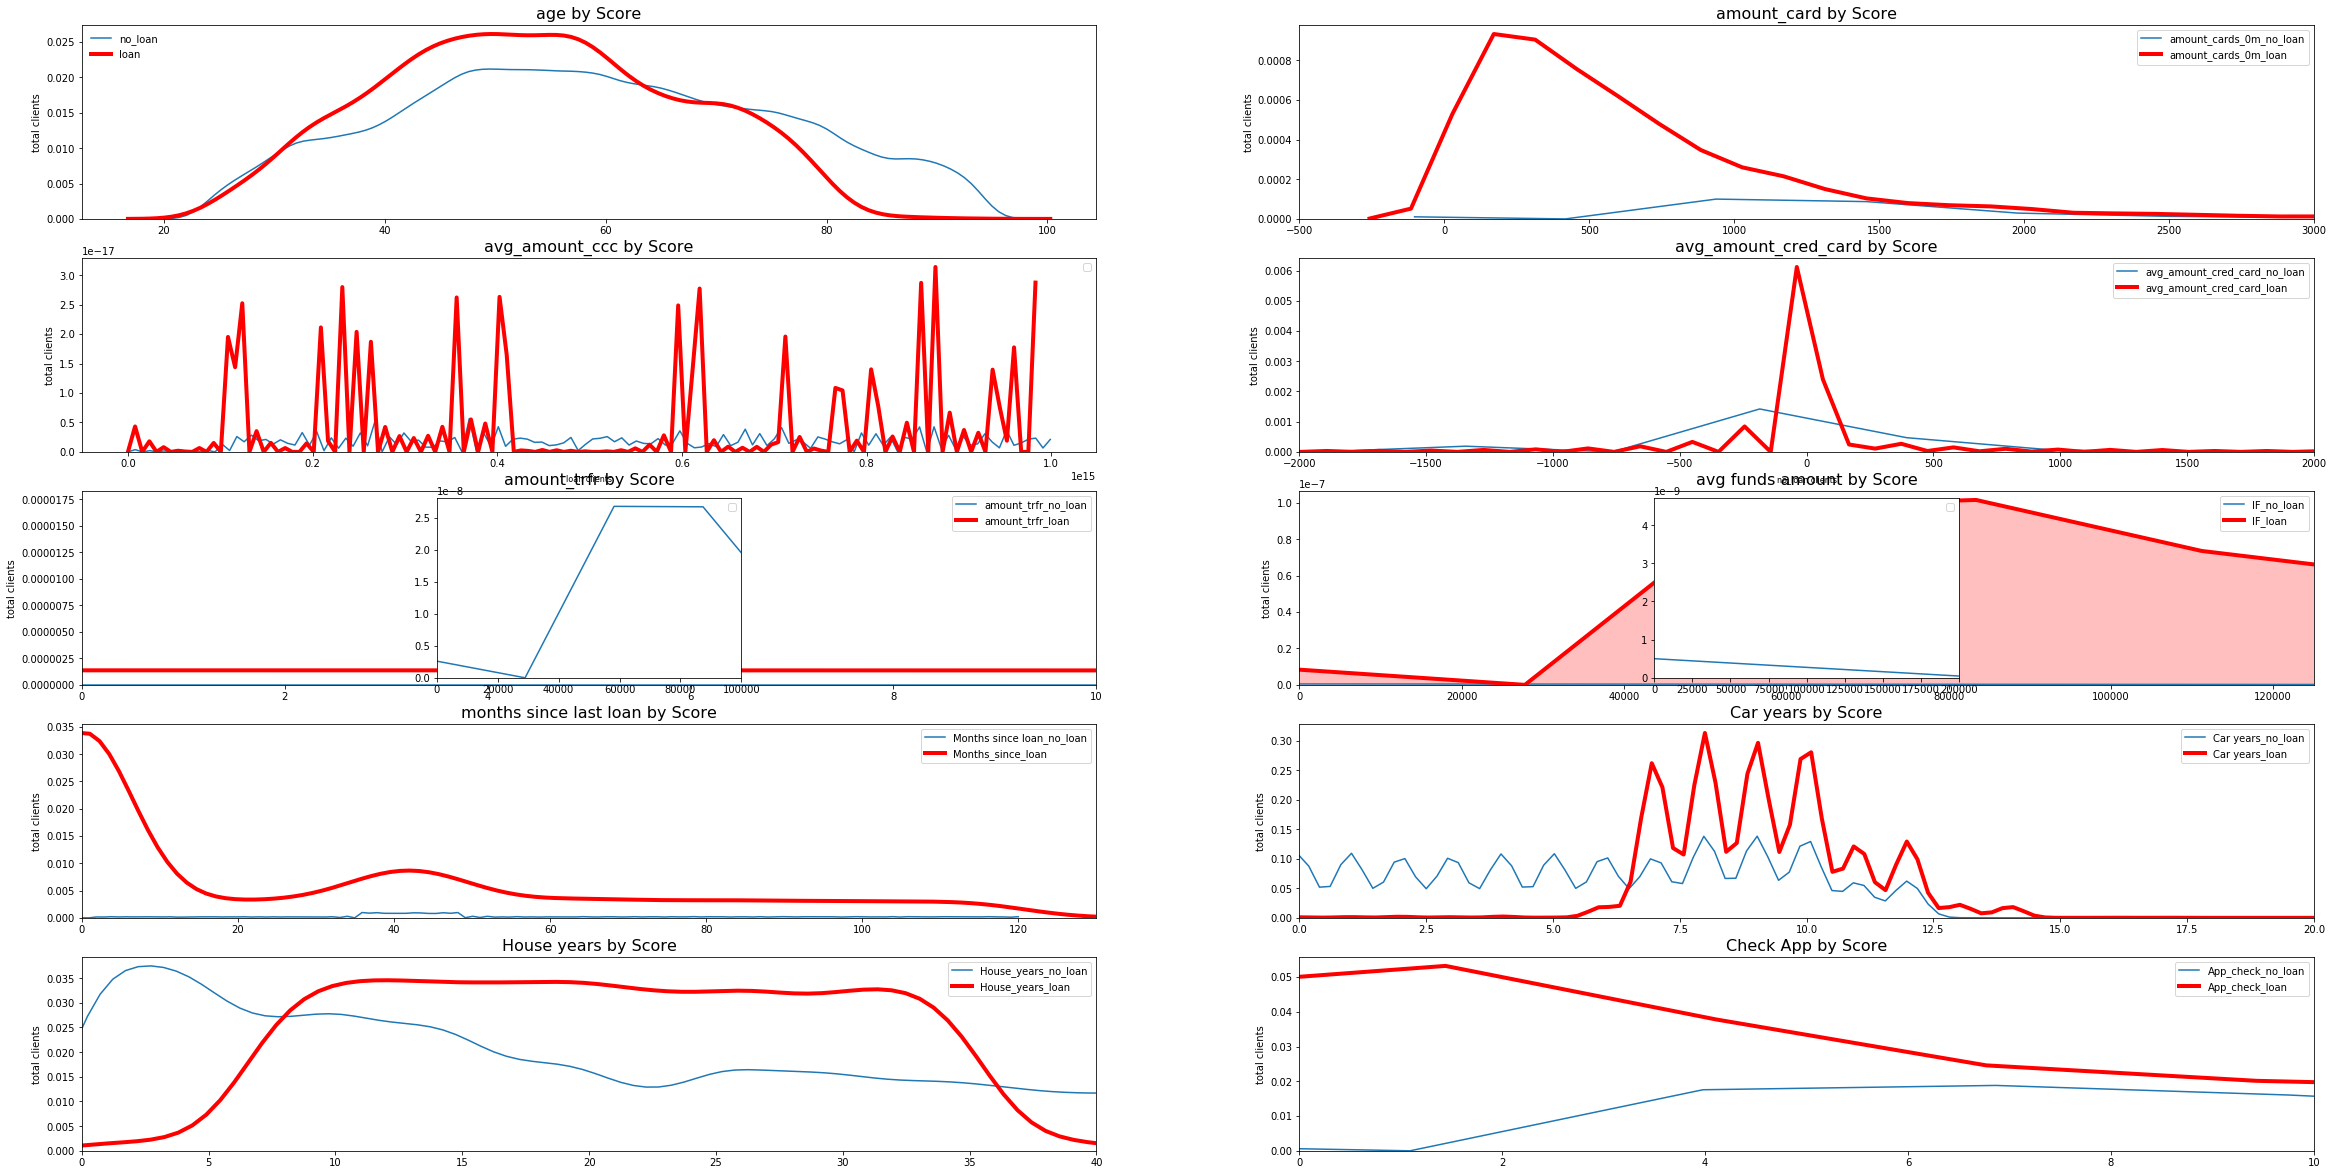

In [36]:
# 1. Using kdeplot from seaborn, plot numerical features which stand out as relevant
warnings.simplefilter('ignore')
'''as usual make a copy of the original dataset'''
graph_df = total_clients_mod.copy()

'''define the variable we are going to use for comparison'''
compare_col_graph = 'got_loan'
'''use the values of the dependent variable'''
val1,val2 = 0,1

''' count number clients with and without loan.Record in a variable'''
no_loan_graph = graph_df.loc[graph_df[compare_col_graph] == val1]
loan_graph = graph_df.loc[graph_df[compare_col_graph] == val2]

 # 2. Initialize the figure,size. Subplot also define the number of plots and its position
plt.figure(figsize=(40,25))
plt.subplot(6, 2, 1)

# 3. Plotting feature 'age'

'''set the title and size.
Define the feature to plot together with got loan values 0 and 1.Define different color and width for got_loan=1 
Set the frame and the legend positioning. 
Name the plot '''

plt.title('age by Score',fontsize = 16)
kdeplot(no_loan_graph.age,label='no_loan',)
kdeplot(loan_graph.age,label='loan',linewidth=4,c='r')
plt.legend(loc='upper left',frameon=False)
plt.ylabel('total clients')


# 4. Plotting feature 'amount_cards_0m'

plt.subplot(6, 2, 2)

plt.title('amount_card by Score',fontsize = 16)

kdeplot(no_loan_graph.amount_cards_0m,label= 'amount_cards_0m_no_loan')
kdeplot(loan_graph.amount_cards_0m,label='amount_cards_0m_loan',linewidth=4,c='r')

plt.xlim(-500, 3000)
plt.ylabel('total clients')


# 5. Plotting feature 'avg_amount_ccc'

ax = plt.subplot(6, 2, 3)

plt.title('avg_amount_ccc by Score',fontsize = 16)

kdeplot(no_loan_graph.aveg_amount_current_acc_0m,label= 'aveg_amount_current_acc_0m_no_loan')
kdeplot(loan_graph.aveg_amount_current_acc_0m,label='iaveg_amount_current_acc_0m_loan', linewidth=4,c='r')

plt.ylabel('total clients')
plt.legend('')


# 6. Plotting feature 'avg_amount_cred_card_0m'

plt.subplot(6, 2, 4)

plt.title('avg_amount_cred_card by Score',fontsize = 16)

kdeplot(no_loan_graph.aveg_amount_cred_card_0m,label='avg_amount_cred_card_no_loan')
kdeplot(loan_graph.aveg_amount_cred_card_0m,label='avg_amount_cred_card_loan',linewidth=4,c='r')
plt.xlim(-2000,2000)
plt.ylabel('total clients')

# 7. Plotting feature 'amount_trfr_0m'

ax = plt.subplot(6, 2, 5)

plt.title('amount_trfr by Score',fontsize = 16)

kdeplot(no_loan_graph.amount_trfr_0m,label='amount_trfr_no_loan')
kdeplot(loan_graph.amount_trfr_0m,label='amount_trfr_loan',linewidth=4,c='r')
plt.xlim(0,10)
plt.legend(loc = 'upper right')
plt.ylabel('total clients')

inset = inset_axes(ax, 
                   width="30%", # width = 30% of parent_bbox
                   height=2.5, # height : 1 inch
                   loc=10)

plt.title('loan clients\n',fontsize = 8)
kdeplot(no_loan_graph.amount_trfr_0m)
plt.xlim(0,100000)
plt.legend('')

# 8. Plotting feature 'aveg_amount_invest_funds_0m'

ax=plt.subplot(6, 2, 6)

plt.title('avg funds amount by Score',fontsize = 16)

kdeplot(no_loan_graph.aveg_amount_invest_funds_0m,label='IF_no_loan')
kdeplot(loan_graph.aveg_amount_invest_funds_0m,label='IF_loan',linewidth=4,shade = True,c='r')
plt.xlim(0,125000)
plt.ylabel('total clients')

inset = inset_axes(ax, 
                   width="30%", # width = 30% of parent_bbox
                   height=2.5, # height : 1 inch
                   loc=10)

plt.title('no_loan clients\n',fontsize = 8)
kdeplot(no_loan_graph.aveg_amount_invest_funds_0m)
plt.xlim(0,200000)
plt.legend('')

# 9. Plotting feature 'Months since loan'

plt.subplot(6, 2, 7)

plt.title('months since last loan by Score',fontsize = 16)

kdeplot(no_loan_graph.months_since_loan,label='Months since loan_no_loan')
kdeplot(loan_graph.months_since_loan,label='Months_since_loan',linewidth=4,c='r')
plt.xlim(0,130)
plt.ylabel('total clients')

# 10. Plotting feature 'Car Years'
plt.subplot(6, 2, 8)

plt.title('Car years by Score',fontsize = 16)

kdeplot(no_loan_graph.car_years,label='Car years_no_loan')
kdeplot(loan_graph.car_years,label='Car years_loan',linewidth=4,c='r')
plt.xlim(0,20)
plt.ylabel('total clients')

# 11. Plotting feature 'House years'
plt.subplot(6, 2, 9)

plt.title('House years by Score',fontsize = 16)

kdeplot(no_loan_graph.House_years,label='House_years_no_loan')
kdeplot(loan_graph.House_years,label='House_years_loan',linewidth=4,c='r')
plt.xlim(0,40)
plt.ylabel('total clients')

# 12. Plotting feature 'App check'

plt.subplot(6, 2, 10)

plt.title('Check App by Score',fontsize = 16)

kdeplot(no_loan_graph.app_par_0m,label='App_check_no_loan')
kdeplot(loan_graph.app_par_0m,label='App_check_loan',linewidth=4,c='r')
plt.xlim(0,10)
plt.ylabel('total clients')

plt.show()


### 2.3 Customers Geolocalization  <a class="anchor" id="2.3-bullet"></a>
[table of contents](#index-bullet)

In [37]:
# 1.  Clients geolocalitation by province total and the ones who got  a loan  

# 2. Need to install first folium :conda install -c conda-forge folium
'''download the map 4 files to local folder and read de shp file '''
polygon_path = os.path.abspath("Provincias.shp")
polygon_pc = gpd.read_file(polygon_path)
polygon_pc['COD_CCAA'] = polygon_pc['COD_CCAA'].astype(int)
''' select the column from my file,change column name to use as key with previous 
file polygon_pc and group the clients by postal code'''

pc_data = total_clients_mod[['cprovper']].rename(columns={ 'cprovper' : 'COD_CCAA'})
pc_data_gp=pc_data.groupby(['COD_CCAA'])['COD_CCAA'].count().reset_index(name="clients")
pc_data_gp=pc_data_gp[pc_data_gp.COD_CCAA != 11111]


'''only with Loan'''

Loan = pd.concat([total_clients_mod[['cprovper']],categorical_file_final_graph[['got_loan']]],axis = 1)
Loan['got_loan'] = Loan['got_loan'].astype(float)
Loan_filt = Loan[Loan['got_loan']> 0]
pc_data_hs = Loan_filt[['cprovper']].rename(columns={ 'cprovper' : 'COD_CCAA'})
pc_data_gp_hs=pc_data_hs.groupby(['COD_CCAA'])['COD_CCAA'].count().reset_index(name="clients")

'''weight no loan clients by province'''
weight_l_clients = (pc_data_gp_hs.clients/pc_data_gp.clients).to_frame()
weight_l_clients_graph = pd.concat([pc_data_gp.COD_CCAA,weight_l_clients],axis =1).astype(float)

'''pass your starting coordinates to folium to create a base map.This will represent the object'''
m = folium.Map(location=[ 40.4636688, -3.7492199], zoom_start=6)

'''Choropleth is used for binding the data between Pandas DataFrames and JSON geometries.Sequential 
color schemes are built-in to the library, and can be passed to visualize different combinations'''

''' In this case the total number os customers by province with a Loan'''

data1 =folium.Choropleth(
       geo_data=polygon_pc,
       name='choropleth',
       data=pc_data_gp,
       columns=['COD_CCAA', 'clients'],
       key_on= 'feature.properties.COD_CCAA',
       fill_color='YlOrRd',
       fill_opacity=0.6,
       line_opacity=0.2,
       highlight=True,
       show=True,
       legend_name='Clients with Loan by province'
).add_to(m)

''' 2 maps will be added. This second one with the percentage of loans by province/ number of clients'''

data2 = folium.Choropleth(
        geo_data=polygon_pc,
        name='choropleth',
        data=weight_l_clients_graph,
        columns=['COD_CCAA', 'clients'],
        key_on= 'feature.properties.COD_CCAA',
        fill_color='YlGn',
        fill_opacity=0.6,
        line_opacity=0.2,
        legend_name='Weighted Clients with Loan by province '
).add_to(m)

# 3. Create a LayerControl object to be added on a folium map. 
#    It wont collapse into an icon but a simple tick will swap the map

folium.LayerControl(collapsed=False).add_to(m)

# 4. Save the info into a html file
m.save('Clients_by_province loans and no loans.html')

from IPython.display import HTML

In [41]:
total_clients_mod.to_csv('total_clients_mod.csv',sep= ';',index =False)